In [1]:
## use machine learning to test different investment strategies for crypto currency

In [23]:
# imports
import pandas as pd
import yfinance as yf
import numpy as np

In [24]:
BTC = yf.download(tickers = "BTC-AUD", period = "10y", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [25]:
BTC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,513.122620,516.007935,504.935272,510.645386,510.645386,23511389
2014-09-18,510.116119,510.002228,459.924286,472.650330,472.650330,38400000
2014-09-19,472.275055,477.761017,428.161682,442.249359,442.249359,42477540
2014-09-20,442.111572,474.174957,436.745819,458.053101,458.053101,41294500
2014-09-21,457.135651,461.998413,440.440247,446.308197,446.308197,29744964


In [26]:
# add a daily return values column to DF
BTC["actual_returns"] = BTC["Close"].pct_change()
BTC = BTC.dropna()
BTC.head()

,Open,High,Low,Close,Adj Close,Volume,actual_returns
Date,,,,,,,
2014-09-18,510.116119,510.002228,459.924286,472.650330,472.650330,38400000,-0.074406
2014-09-19,472.275055,477.761017,428.161682,442.249359,442.249359,42477540,-0.064320
2014-09-20,442.111572,474.174957,436.745819,458.053101,458.053101,41294500,0.035735
2014-09-21,457.135651,461.998413,440.440247,446.308197,446.308197,29744964,-0.025641
2014-09-22,446.620422,456.952271,444.913727,453.077972,453.077972,27182965,0.015168


In [27]:
# Generating feature and target sets
# define a window size of 7 and 50
short_window = 7
long_window = 50
BTC["fast"] = BTC["Close"].rolling(window = short_window).mean()
BTC["slow"] = BTC["Close"].rolling(window = long_window).mean()

C:\Users\Jacks\AppData\Local\Temp\ipykernel_25632\652788242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC["fast"] = BTC["Close"].rolling(window = short_window).mean()
C:\Users\Jacks\AppData\Local\Temp\ipykernel_25632\652788242.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC["slow"] = BTC["Close"].rolling(window = long_window).mean()


In [28]:
BTC = BTC.dropna()

In [29]:
BTC.head()

,Open,High,Low,Close,Adj Close,Volume,actual_returns,fast,slow
Date,,,,,,,,,
2014-11-06,395.777100,412.199005,393.516296,408.001404,408.001404,21956547,0.030802,383.707559,422.480257
2014-11-07,408.618134,412.455566,396.262024,396.680969,396.680969,19502085,-0.027746,385.447784,420.960870
2014-11-08,396.378571,402.029663,396.378571,400.240967,400.240967,9888172,0.008974,389.737728,420.120702
2014-11-09,400.111237,420.522736,398.812561,420.298523,420.298523,28006016,0.050114,396.573517,419.365610
2014-11-10,419.142670,434.871796,412.649750,425.567169,425.567169,35316748,0.012535,403.515189,418.950790


In [30]:
# creating features set
X = BTC[["fast","slow"]].copy()
X.head()

,fast,slow
Date,,
2014-11-06,383.707559,422.480257
2014-11-07,385.447784,420.960870
2014-11-08,389.737728,420.120702
2014-11-09,396.573517,419.365610
2014-11-10,403.515189,418.950790


In [31]:
# create the target set
BTC["signal"] = 0.0

# Create the signal to buy
BTC.loc[(BTC['actual_returns'] >= 0), 'signal'] = 1

# Create the signal to sell
BTC.loc[(BTC['actual_returns'] < 0), 'signal'] = -1

# setting target
y = BTC["signal"].copy()

C:\Users\Jacks\AppData\Local\Temp\ipykernel_25632\1588072208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC["signal"] = 0.0


In [44]:
## splitting data into training and testing datasets
# imports
from pandas.tseries.offsets import DateOffset

In [49]:
# Select the start of the training period
training_begin = X.index.min()
print(training_begin)

# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(years=5)

# Display the training end date
print(training_end)

2014-11-06 00:00:00
2019-11-06 00:00:00


In [52]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]


In [54]:
## Standardize the data

In [56]:
# Imports
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [57]:
## Incorporate the SVM Machine Learning Into the Trading Strategy

In [58]:
# Imports
from sklearn import svm
from sklearn.metrics import classification_report

# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [59]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.55      0.09      0.16       825
         1.0       0.56      0.94      0.70      1002

    accuracy                           0.56      1827
   macro avg       0.55      0.52      0.43      1827
weighted avg       0.55      0.56      0.46      1827



In [60]:
## Backtesting a Machine Learning Trading Algorithm

In [63]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

# Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.39      0.11      0.18       458
         1.0       0.49      0.83      0.62       478

    accuracy                           0.48       936
   macro avg       0.44      0.47      0.40       936
weighted avg       0.44      0.48      0.40       936



In [64]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = BTC["actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2019-11-06,1.0,0.003888,0.003888
2019-11-07,1.0,-0.013126,-0.013126
2019-11-08,1.0,-0.044746,-0.044746
2019-11-09,1.0,0.000988,0.000988
2019-11-10,1.0,0.028132,0.028132


<AxesSubplot:xlabel='Date'>

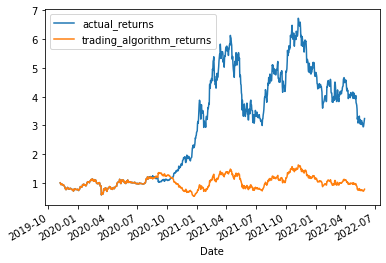

In [65]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()